

```
### Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

```



In [331]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [332]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
data = pd.read_csv('sample_data/fcc-forum-pageviews.csv',index_col='date',parse_dates=['date'])


In [333]:
data.head(2)

,value
date,
2016-05-09,1201
2016-05-10,2329


In [334]:
#Checking if there are any null values or not 
data.value.isnull().any()

False

In [335]:
#shape 
data.shape

(1304, 1)

In [336]:
data.value.quantile(0.025)

17876.4

In [337]:
data.value.quantile(0.975)

177613.075

In [338]:
data.describe().round(0)

,value
count,1304.0
mean,67221.0
std,59340.0
min,1201.0
25%,35758.0
50%,57198.0
75%,83883.0
max,1173655.0


In [339]:
# * Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

requiredFilter = (data.value >=  data.value.quantile(0.025)) & (data.value <=  data.value.quantile(0.975))
data = data.loc[requiredFilter,:]
data.shape



(1238, 1)

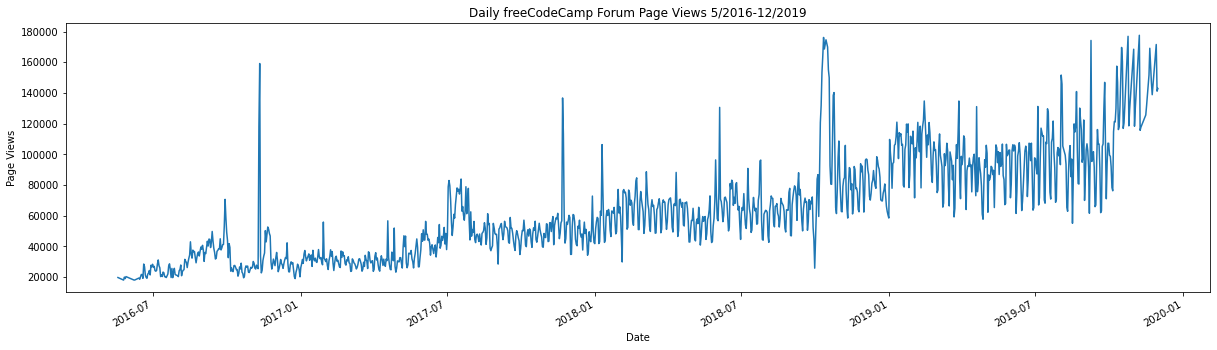

In [340]:
# * Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
# The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
# The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

requiredData = data.loc['2016-05-01':'2019-12-01',:]
plt.plot(requiredData.index , requiredData.value)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

fig = plt.gcf()
fig.set_size_inches(20.5,5.5)
fig.autofmt_xdate() 




In [341]:
#* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png".
# It should show average daily page views for each month grouped by year.
# The legend should show month labels and have a title of "Months".
# On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

#Grouping by YEAR AND MONTH and getting mean , (dont use month_name()!)

df = data.groupby([data.index.year,data.index.month]).value.mean()
df.head(3)



date  date
2016  5       19432.400000
      6       21875.105263
      7       24109.678571
Name: value, dtype: float64

In [342]:
# Renaming Index
df.index.rename(['Years','Months'],inplace=True)
df.head(3)

Years  Months
2016   5         19432.400000
       6         21875.105263
       7         24109.678571
Name: value, dtype: float64

In [343]:
# Unstcking to get DF
df = df.unstack()
df.head(3)


Months,1,2,3,4,5,6,7,8,9,10,11,12
Years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871


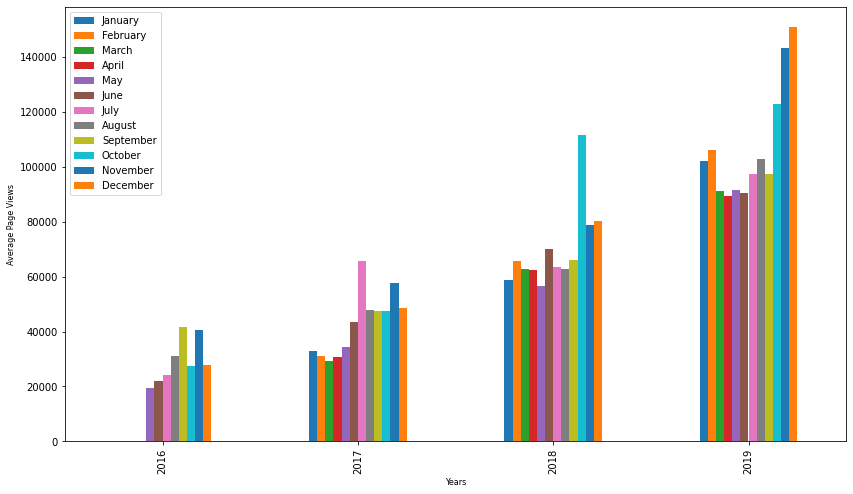

In [344]:
#Plotting 
fig = df.plot(kind ="bar", legend = True, figsize = (14,8)).figure
plt.xlabel("Years", fontsize= 8)
plt.ylabel("Average Page Views", fontsize= 8)
plt.legend(labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])



In [345]:
# Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png".
# These box plots should show how the values are distributed within a given year or month and how it compares over time.
# The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)".
# Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

box_plot_data = requiredData.copy()


In [346]:
#adding year column to the existing DF
box_plot_data['year'] = box_plot_data.index.year
box_plot_data.head(3)

,value,year
date,,
2016-05-19,19736,2016
2016-05-26,18060,2016
2016-05-27,19997,2016


In [347]:
#adding month(literal) , month_number column to the existing DF
box_plot_data['month_num'] = box_plot_data.index.month
box_plot_data['month'] = box_plot_data.index.month_name()

#sorting by month_num so that its from jan to dec
box_plot_data.sort_values(['month_num'],inplace=True)


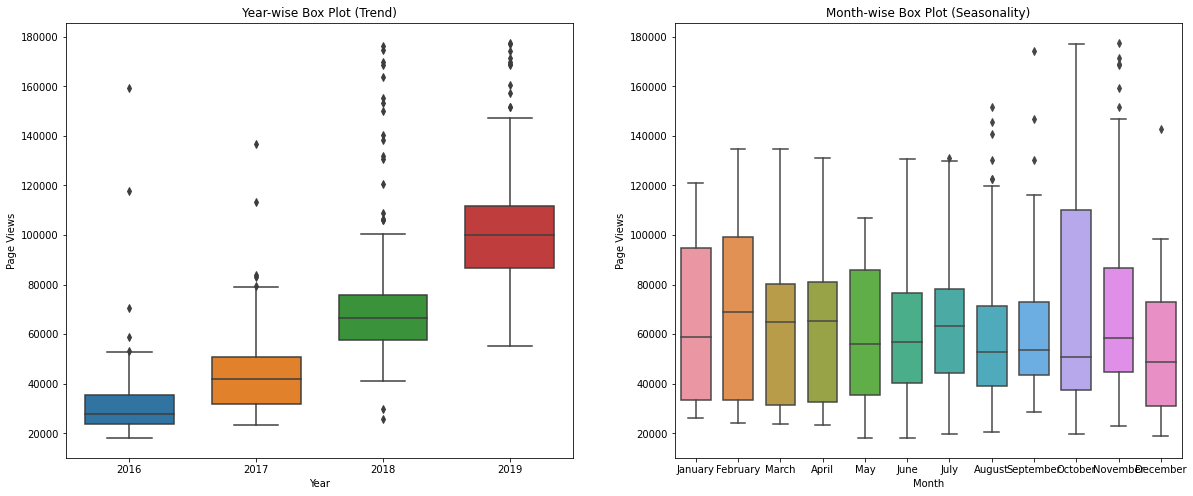

In [348]:
#Sub plotting as per the requirement
fig, ax = plt.subplots(1,2)

ax[0] = sns.boxplot(x = box_plot_data['year'],y=box_plot_data['value'],width=.7, ax = ax[0])
ax[1] = sns.boxplot(x = box_plot_data['month'],y=box_plot_data['value'],width=.7, ax = ax[1])

ax[0].set_title("Year-wise Box Plot (Trend)")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')

ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')

fig.set_size_inches(20,8)


